**By Manan Pareek**

In [1]:
import os
import cv2
import keras
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from matplotlib import pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
%matplotlib inline



In [2]:
DIRECTORY = '/content/drive/MyDrive/IBM_AI_Project/seg_train'
CATEGORIES = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [3]:
data = []

In [4]:
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        label = CATEGORIES.index(category)
        arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        new_arr = cv2.resize(arr, (120, 120))
        data.append([new_arr, label])

In [5]:
random.shuffle(data)
X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

X = np.array(X)
y = np.array(y)
X = X/255
X = X.reshape(-1, 120, 120, 1)
X.shape

(14034, 120, 120, 1)

In [6]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, input_shape = X.shape[1:], activation = 'relu'))

model.add(Dense(6, activation = 'softmax'))

In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(X, y, epochs=8, validation_split=0.1)

Epoch 1/8
395/395 [==============================] - 26s 43ms/step - loss: 1.0549 - accuracy: 0.5903 - val_loss: 0.8939 - val_accuracy: 0.6709
Epoch 2/8
395/395 [==============================] - 16s 42ms/step - loss: 0.7231 - accuracy: 0.7307 - val_loss: 0.7734 - val_accuracy: 0.6959
Epoch 3/8
395/395 [==============================] - 17s 43ms/step - loss: 0.5277 - accuracy: 0.8064 - val_loss: 0.8082 - val_accuracy: 0.7108
Epoch 4/8
395/395 [==============================] - 17s 43ms/step - loss: 0.3309 - accuracy: 0.8840 - val_loss: 0.7898 - val_accuracy: 0.7621
Epoch 5/8
395/395 [==============================] - 16s 42ms/step - loss: 0.1848 - accuracy: 0.9387 - val_loss: 0.9365 - val_accuracy: 0.7372
Epoch 6/8
395/395 [==============================] - 16s 41ms/step - loss: 0.1148 - accuracy: 0.9632 - val_loss: 1.0181 - val_accuracy: 0.7578
Epoch 7/8
395/395 [==============================] - 16s 42ms/step - loss: 0.0807 - accuracy: 0.9778 - val_loss: 1.2242 - val_accuracy: 0.7158

In [9]:
def image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    new_arr = cv2.resize(img, (120, 120))
    new_arr = np.array(new_arr)
    new_arr = new_arr.reshape(-1, 120, 120, 1)
    return new_arr

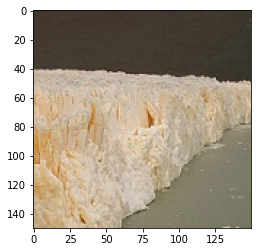

glacier


In [11]:
img= '/content/drive/MyDrive/IBM_AI_Project/seg_pred/10034.jpg'

im = cv2.imread(img)
plt.imshow(im)
plt.show()

prediction = model.predict([image(img)])
print(CATEGORIES[prediction.argmax()])